<a href="https://colab.research.google.com/github/Rak28/Colab-Programs/blob/master/covidmit/Covid_19_AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakshithkrishnaraj","key":"9f8de792e7d3a7322f306ddbd7e5a482"}'}

In [6]:
!pip install -q kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [8]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

 99% 2.04G/2.06G [00:22<00:00, 114MB/s]
100% 2.06G/2.06G [00:22<00:00, 97.9MB/s]


In [9]:
!ls

chest-xray-covid19-pneumonia.zip  kaggle.json  sample_data


In [10]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

# Importing Libraries


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os

In [17]:
os.listdir("Data")

['train', 'test']

In [18]:
train_dir = "Data/train"
test_dir = "Data/test"

In [19]:
print(os.listdir(train_dir))
print(os.listdir(test_dir))

['NORMAL', 'PNEUMONIA', 'COVID19']
['NORMAL', 'PNEUMONIA', 'COVID19']


# Analysing the Dataset

In [20]:
#Number of images in covid19 folder
len(os.listdir(train_dir+"/COVID19"))

460

In [21]:
#Number of images in pneumonia folder
len(os.listdir(train_dir+"/PNEUMONIA"))

3418

In [22]:
#Number of images in normal folder
len(os.listdir(train_dir+"/NORMAL"))

1266

In [23]:
covid = imread(train_dir+"/COVID19"+"/COVID19(189).jpg")
normal = imread(train_dir+"/NORMAL"+"/NORMAL(0).jpg")
pneumonia = imread(train_dir+"/PNEUMONIA"+"/PNEUMONIA(0).jpg")

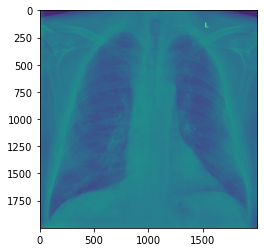

In [24]:
plt.imshow(covid,cmap="gray")
plt.imshow(covid)

In [25]:
covid.shape

(2000, 2000)

In [26]:
import cv2

covid_eg = imread(train_dir+"/COVID19"+"/COVID19(0).jpg")
covid_eg.shape
covidd_eg_conv = cv2.cvtColor(covid_eg,cv2.COLOR_GRAY2BGR)
covidd_eg_conv.shape

(2000, 2000, 3)

In [27]:
normal.shape

(1317, 1855, 3)

In [28]:
pneumonia.shape

(760, 1152, 3)

In [29]:
dim1=[]
dim2=[]
covd = train_dir+"/PNEUMONIA"
for i in os.listdir(covd):
#     print(i)
    img = imread(covd+"/"+i)
#     print(img.shape)
    d1,d2,_=img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


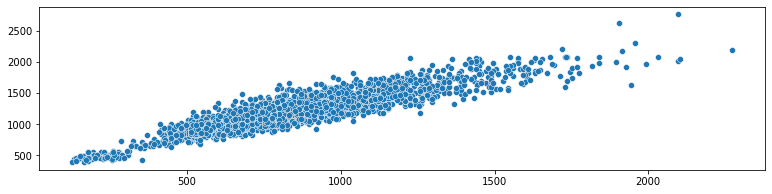

In [30]:
plt.figure(figsize=(13,3))
sns.scatterplot(dim1,dim2)

In [31]:
np.mean(dim1)

828.5772381509655

In [32]:
np.mean(dim2)

1189.5617320070216

## Data augmentation using ImageDataGenerator

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=False, 
    vertical_flip=False,
    zoom_range=0.2,
    rescale=1/255
)

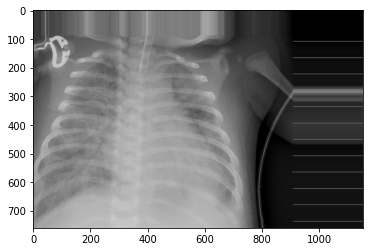

In [35]:
plt.imshow(generator.random_transform(pneumonia))

In [36]:
generator.flow_from_directory(train_dir)

Found 5144 images belonging to 3 classes.


In [37]:
train_generator = generator.flow_from_directory(
    train_dir,
    target_size=[400,400],
    class_mode='categorical',
    batch_size=32,
    shuffle=False  
)

Found 5144 images belonging to 3 classes.


In [38]:
test_generator = generator.flow_from_directory(
    test_dir,
    target_size=[400,400],
    class_mode='categorical',
    batch_size=32,
    shuffle=False  
)

Found 1288 images belonging to 3 classes.
